In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
import os
import cv2
import dlib
from google.colab.patches import cv2_imshow
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
SYM_PATH = '/content/drive/MyDrive/DeepFakeDetection'
%cd $SYM_PATH
%pip install -e .

/content/drive/MyDrive/DeepFakeDetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/DeepFakeDetection
  Attempting uninstall: DeepFake
    Found existing installation: DeepFake 0.1.0
    Can't uninstall 'DeepFake'. No files were found to uninstall.
  Running setup.py develop for DeepFake


In [21]:
#from drive.MyDrive.DeepFakeDetection.packages.DlibManager import DlibManager

from packages.DlibManager import DlibManager

In [22]:
video_path = '/content/drive/MyDrive/DeepFakeDetection/data/FakeAVCeleb_v1.2/RealVideo-RealAudio/African/men/id00076/00109.mp4'
video = cv2.VideoCapture(video_path)

predictor_path = '/content/drive/MyDrive/DeepFakeDetection/model/shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

In [23]:
dlib_manager = DlibManager(predictor, detector, video)
#dlib_manager.generateLandmarks()

In [24]:
lip_frames = dlib_manager.lip_frames

In [25]:
#resize all the lip frames to 70 x 90
lip_frames_resized = []
for frame in lip_frames:
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  resized_frame = cv2.resize(frame, (90, 70))
  lip_frames_resized.append(resized_frame)
lip_frames_resized = np.array(lip_frames_resized)



In [44]:
reshape_lip_frames = lip_frames_resized.reshape(lip_frames_resized.shape[0], lip_frames_resized.shape[1]*lip_frames_resized.shape[2])

scalar = StandardScaler()
norm_pca_lip_frames = scalar.fit_transform(reshape_lip_frames)

ValueError: ignored

In [27]:
components = 1
pca = PCA(n_components=components)
pca_lip_frames = pca.fit_transform(norm_pca_lip_frames)

In [28]:
pca_lip_frames.shape

(251, 1)

In [29]:
reverse_pca_lip_frames = pca.inverse_transform(pca_lip_frames)
reverse_pca_lip_frames = scalar.inverse_transform(reverse_pca_lip_frames)
reverse_pca_lip_frames = reverse_pca_lip_frames.reshape(lip_frames_resized.shape[0], lip_frames_resized.shape[1], lip_frames_resized.shape[2])

In [33]:
reverse_pca_lip_frames.shape

(251, 70, 90)

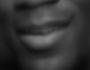

In [43]:
cv2_imshow(reverse_pca_lip_frames[150])

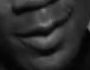

In [32]:
cv2_imshow(lip_frames_resized[0])